In [2]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib import animation
from IPython.display import HTML

plt.rcParams['figure.figsize'] = [16, 10]

### Low Pass Filter Equation

$$
y[n] = \alpha x[n] + \beta y[n-1]
$$

And for the case where $\beta = 1 - \alpha$, we can get

$$
y[n] = \alpha x[n] + (1-\alpha) y[n-1] \\
y[n] = y[n-1] + \alpha (x[n] - y[n-1])
$$

In programming languages, $y[n-1]$ can be the same reference as $y[n]$ when executing this line, so it can be converted to

```python
y = y + alpha * (x - y)
```

And therefore we get

```python
delta = x - y
y += alpha * delta
```

### Filter Bandwidth (Cutoff Frequency)

$$
\alpha = e^{−2\pi f_c}
$$

In [46]:

def Encoder_getDecay(bandwidth):
    decay = 1 - np.power(np.e, -2 * np.pi * bandwidth)
    return decay
 
encoder_filter_out = 0
def Encoder_IIRfilter(value, decay=0.1):
    global encoder_filter_out
    global prev_value
    
    delta_value = value - encoder_filter_out
    encoder_filter_out += decay * delta_value
    
    return encoder_filter_out


In [47]:
Encoder_getDecay(4e4 / 20e3)

0.9999965126576438

decay: 0.0003141099225042465


Text(0.5, 1.0, 'Phase Current')

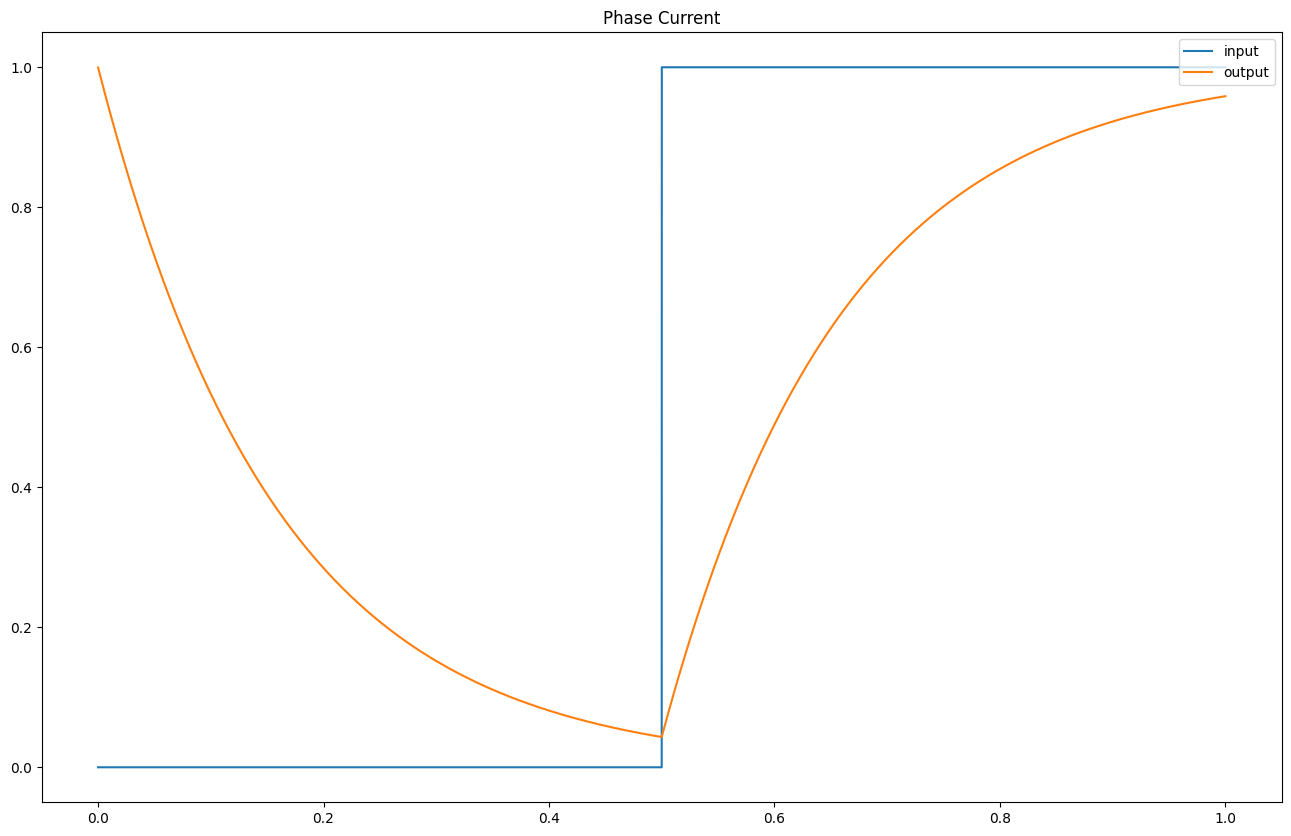

In [62]:
samp_freq = 20e3
bandwidth = 1

decay = Encoder_getDecay(bandwidth / samp_freq)
print("decay:", decay)

# time series
t = np.linspace(0, 1, int(1*samp_freq))
theta = t

in_arr = np.ones(t.shape[0])
in_arr[0:int(samp_freq//2)] = 0
out_arr = []

for elem in in_arr:
#     print(elem, encoder_filter_out)
    out_arr.append(Encoder_IIRfilter(elem, decay))

fig = plt.figure()
i_a_line, = plt.plot(t, in_arr, label="input")
i_a_line, = plt.plot(t, out_arr, label="output")
plt.legend(loc="upper right")
plt.title("Phase Current")